# Test models performences

In [62]:
# import modules and load data

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

# Load input and output data
X = np.load("../data/AmitS_landmark.npy")
Y = np.load("../data/AmitS_distance.npy")

# Manipulate the data 

# Round output data to binary
middle_distance = np.max(Y) // 2
roundOut = np.vectorize(lambda t: 1 if (t < middle_distance) else 0)
Y = roundOut(Y)
Y = np.concatenate((np.split(Y, [30])[1], np.zeros(30)))

# Split the data (Don't shuffle! sequntial data should stay in order)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.2, shuffle=False ) 

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, shuffle=False)

#### Model 1

In [105]:

# Define the model 
model = tf.keras.Sequential([
    layers.Input(shape=(68,2)),
    layers.SimpleRNN(256, return_sequences=False),  # or use LSTM/GRU
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output a single scalar
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=16)


Epoch 1/2
186/186 [==============================] - 2s 10ms/step - loss: 0.6934 - accuracy: 0.5451 - val_loss: 0.6573 - val_accuracy: 0.8016
Epoch 2/2
186/186 [==============================] - 2s 10ms/step - loss: 0.6884 - accuracy: 0.5596 - val_loss: 0.6403 - val_accuracy: 0.8016


## Test Performences

==== MODEL #1 ====
116/116 [==============================] - 0s 4ms/step
Decision Level: 0.45260974764823914
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.06      0.12      2251
         1.0       0.40      0.97      0.57      1451

    accuracy                           0.42      3702
   macro avg       0.58      0.52      0.34      3702
weighted avg       0.62      0.42      0.29      3702



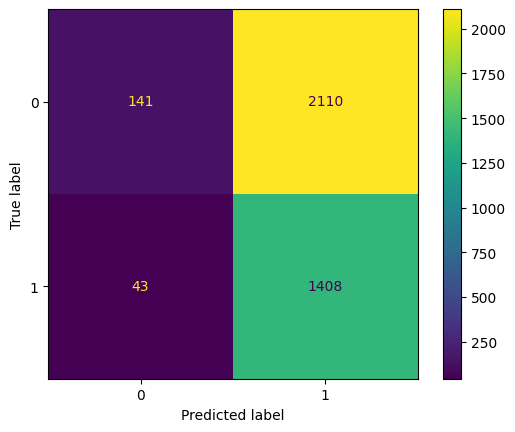

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')

# Model 1
print("==== MODEL #1 ====")

# Predict probabilities
y1_prob = model.predict(x_val)

decision_level = np.mean(y1_prob)
print(f"Decision Level: {decision_level}")

# Convert probabilities to binary predictions
y1_pred = (y1_prob >= decision_level).astype(int).squeeze()

# Confusion Matrix
cm1 = confusion_matrix(y_val, y1_pred)
disp1 = ConfusionMatrixDisplay(cm1)


# Classification Report
report1 = classification_report(y_val, y1_pred)

displayCM = True

if displayCM:
    disp1.plot()
    print("Classification Report:\n", report1)
else:
    plt.plot(y1_prob)
    plt.show()
    plt.plot(y1_pred)
    plt.show()